In [1]:
import pymongo
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [3]:
file = "dataset.csv"

In [4]:
db = client["Dataset_mongo"]

In [5]:
mycol = db['Dataset']

In [6]:
# query = mycol.find({"$and":[{"updatedate":{"$gte":'2021-03-23T04:20:14.000Z'}}, #O2100
#                             {"enddate":{"$lte":'2021-03-23T04:25:19.500Z'}} 
#                            ]},
#                   {"updatedate":1,"enddate":1,"timespan":1,"signalname":1,"value":1})
# list_cur = list(query)
# signals = pd.DataFrame(list_cur)

In [7]:
# signals['signalname'].value_counts()

In [8]:
# len(signals)

In [9]:
# signals_list = signals['signalname'].unique()

In [10]:
# len(signals_list)

In [11]:
# signals = signals.drop('_id',axis = 1)

In [12]:
# signals.head(10)

In [13]:
time = np.arange(0,306,0.5)

In [14]:
time = list(time)
# time

In [15]:
import datetime
import dateutil.parser
def find_time_sec(ndate,udate):
    ndate = dateutil.parser.parse(ndate)
    udate = dateutil.parser.parse(udate)
    diff_time = ndate - udate
    diff = str(diff_time)
    time_lst = diff.split(':')
    sec = time_lst[2].split('.')
    x = diff.find('.')
    if x != -1:
        time_in_seconds = int(time_lst[0])*3600 + int(time_lst[1])*60 + int(sec[0]) + int(sec[1])/1000000
    else:
        time_in_seconds = int(time_lst[0])*3600 + int(time_lst[1])*60 + int(time_lst[2])
    return time_in_seconds


In [16]:
# start_time = find_time_sec('2021-03-23T04:20:16.500Z','2021-03-23T04:20:14.000Z')
# start_time

In [17]:
# added_signals = []
# index = 0.0
# for i in range(len(signals)):
# #     print(signals.iloc[i,3],index,i,signals.iloc[i,2])
#     if signals.iloc[i,3] not in added_signals:
#         added_signals.append(signals.iloc[i,3])
#         start_time = find_time_sec(signals.iloc[i,0],'2021-03-23T04:20:14.000Z')
#         index = float(start_time)
#     time_span = signals.iloc[i,2]
#     print(index)
#     while time_span > 0:
#         cycle_data.at[signals.iloc[i,3],index] = signals.iloc[i,4]
#         time_span = time_span - 0.5
#         index += 0.5
# #     print(index)

In [18]:
# list(cycle_data.iloc[0])

In [19]:
name_signal = 'ServoLoad_2_path1_OP20MAKINO_861'
main_prog = '//CNC_MEM/USER/LIBRARY/O2100'
machine = 'OP20MAKINO_861'
time_start = '2021-03-23T04:20:16.500Z'
time_end = '2021-03-23T05:20:16.500Z'
# find_time_sec(time_start,time_end)
query = mycol.find({"$and":[{"updatedate":{"$gte":time_start}}, #O2100
                            {"enddate":{"$lte":time_end}},
                            {"signalname":{'$eq':name_signal}}
#                             {"L1Name":{'$eq':machine}}
                           ]},
                  {"updatedate":1,"enddate":1,"timespan":1,"signalname":1,"value":1})
list_cur = list(query)
new_signals = pd.DataFrame(list_cur)

In [20]:
new_signals.shape[0]

857

In [21]:
# new_signals.head(40)

In [22]:
new_signals['timespan'].max()

171.5

In [23]:
new_signals = new_signals.drop('_id',axis = 1)

In [62]:
def plot_data():
    r = np.random.random()
    b = np.random.random()
    g = np.random.random()
    color = (r, g, b)
#     plt.figure(figsize=(5,5))
    plt.plot(time, cycle_data['ServoLoad_2_path1_OP20MAKINO_861'], color = color)

In [26]:
lst_sign = []
lst_sign.append(name_signal)
lst_sign

['ServoLoad_2_path1_OP20MAKINO_861']

In [27]:
cycle_data = pd.DataFrame(columns = lst_sign,index = time)
cycle_data

,ServoLoad_2_path1_OP20MAKINO_861
0.0,NaN
0.5,NaN
1.0,NaN
1.5,NaN
2.0,NaN
...,...
303.5,NaN
304.0,NaN
304.5,NaN
305.0,NaN


In [28]:
# 305.5 % 305.5

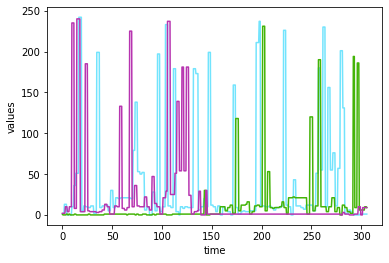

<Figure size 576x432 with 0 Axes>

No of plots 3


In [74]:
index = 0.0
count = 0.0
rem_time = 0.0
no_of_plots = 0
start = '2021-03-23T04:20:16.500Z'
start_time = find_time_sec(new_signals.iloc[0,0],start)
index = float(start_time)
for i in range(len(new_signals)):
#     print(index)
        
    if (count%306 == 0.0 or index > 305.5) and index > 0.0:
#         print('index',index)
#         print('Plotting........')
        plot_data()
        no_of_plots += 1
        if no_of_plots == 3:
            break;
#         plt.show()
        index = float(find_time_sec(new_signals.iloc[i,0],new_signals.iloc[i-1,1]))
        count = 0
        count += index
        cycle_data = pd.DataFrame(columns = lst_sign,index = time)
        index = index + rem_time
        if rem_time != 0:
            j = 0
            while rem_time > 0:
                count = count + 0.5
                cycle_data.at[j,new_signals.iloc[0,3]] = value
                j = j+0.5
                rem_time = rem_time - 0.5
#         print(cycle_data.head(5))
#         print(cycle_data.head(5))
#         added_signals.append(signals.iloc[i,3])
#         index = float(find_time_sec(start,new_signals.iloc[i,0]))
    
    time_span = new_signals.iloc[i,2]
#     print(time_span)
    while time_span > 0 and index <= 305.5:
        count = count + 0.5
        cycle_data.at[index,new_signals.iloc[i,3]] = new_signals.iloc[i,4]
        time_span = time_span - 0.5
        index += 0.5
        if index == 305.5:
            rem_time = time_span
            value = new_signals.iloc[i,4]
#             print(rem_time, value)
plt.xlabel('time')
plt.ylabel('values')
plt.figure(figsize = (8,6))
plt.show()
print('No of plots',no_of_plots)

In [68]:
cycle_data.head(40)

,ServoLoad_2_path1_OP20MAKINO_861
0.0,2
0.5,2
1.0,2
1.5,2
2.0,2
2.5,2
3.0,10
3.5,10
4.0,10
4.5,10
